## Task_1. Prediction using Supervised Machine Learning
### GRIP @ The Sparks Foundation

- In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
- This is a simple linear regression task as it involves just two variables.   

In [1]:
import numpy as  np , pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

### 1. Reading the data

In [4]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 2. Data Visualization 

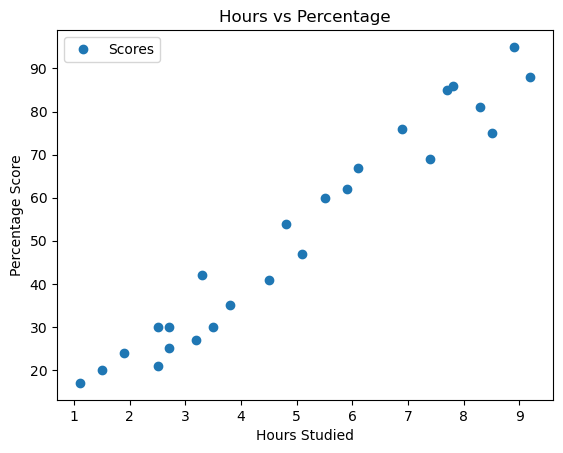

In [7]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

- From the above graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

### Step 3 - Data Preprocessing
- This step involved division of data into "attributes" (inputs) and "labels" (outputs). 

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

### Step 4 - Train Model
- Splitting the data into training and testing sets, and training the algorithm.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

LinearRegression()

### Step 5 - Plotting the Line of regression
- Now since our model is trained now, its the time to visualize the best-fit line of regression.

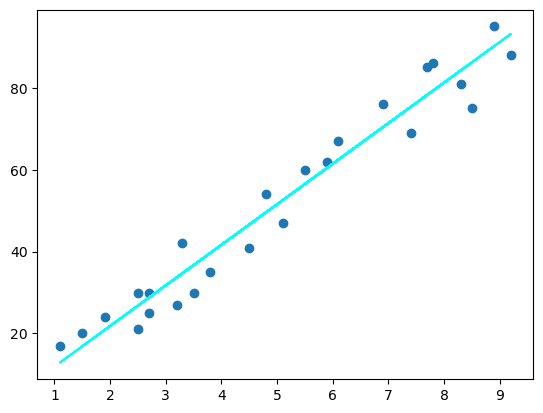

In [12]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line,color='cyan');
plt.show()

### Step 6 - Making Predictions
- Now that we have trained our algorithm, it's time to test the model by making some predictions.
- For this we will use our test-set data

In [13]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Step 7 - Comparing Actual result to the Predicted Model result 

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


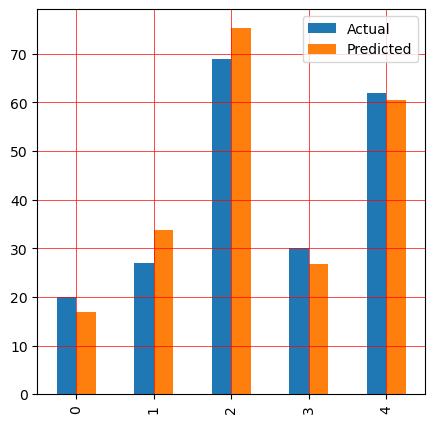

In [16]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [17]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Step 8 - Evaluating the model
- The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy. 

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


## # R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.